# 기상 상황 주행 분류 프로젝트 (개인)

### Tensorflow cnn 구현 이미지 분류

##### 1.데이터 로드

In [15]:
from glob import glob

path = 'D://기상 상황 주행 분류 데이터'

train_data = glob(path+'//Train')


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [17]:
train_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=128,
    image_size=(225,225),
    seed=100,
    validation_split=0.2,
    subset='training'
)
val_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=128,
    image_size=(225,225),
    seed=100,
    validation_split=0.2,
    subset='validation'
)

Found 45903 files belonging to 4 classes.
Using 36723 files for training.
Found 45903 files belonging to 4 classes.
Using 9180 files for validation.


In [18]:
train_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

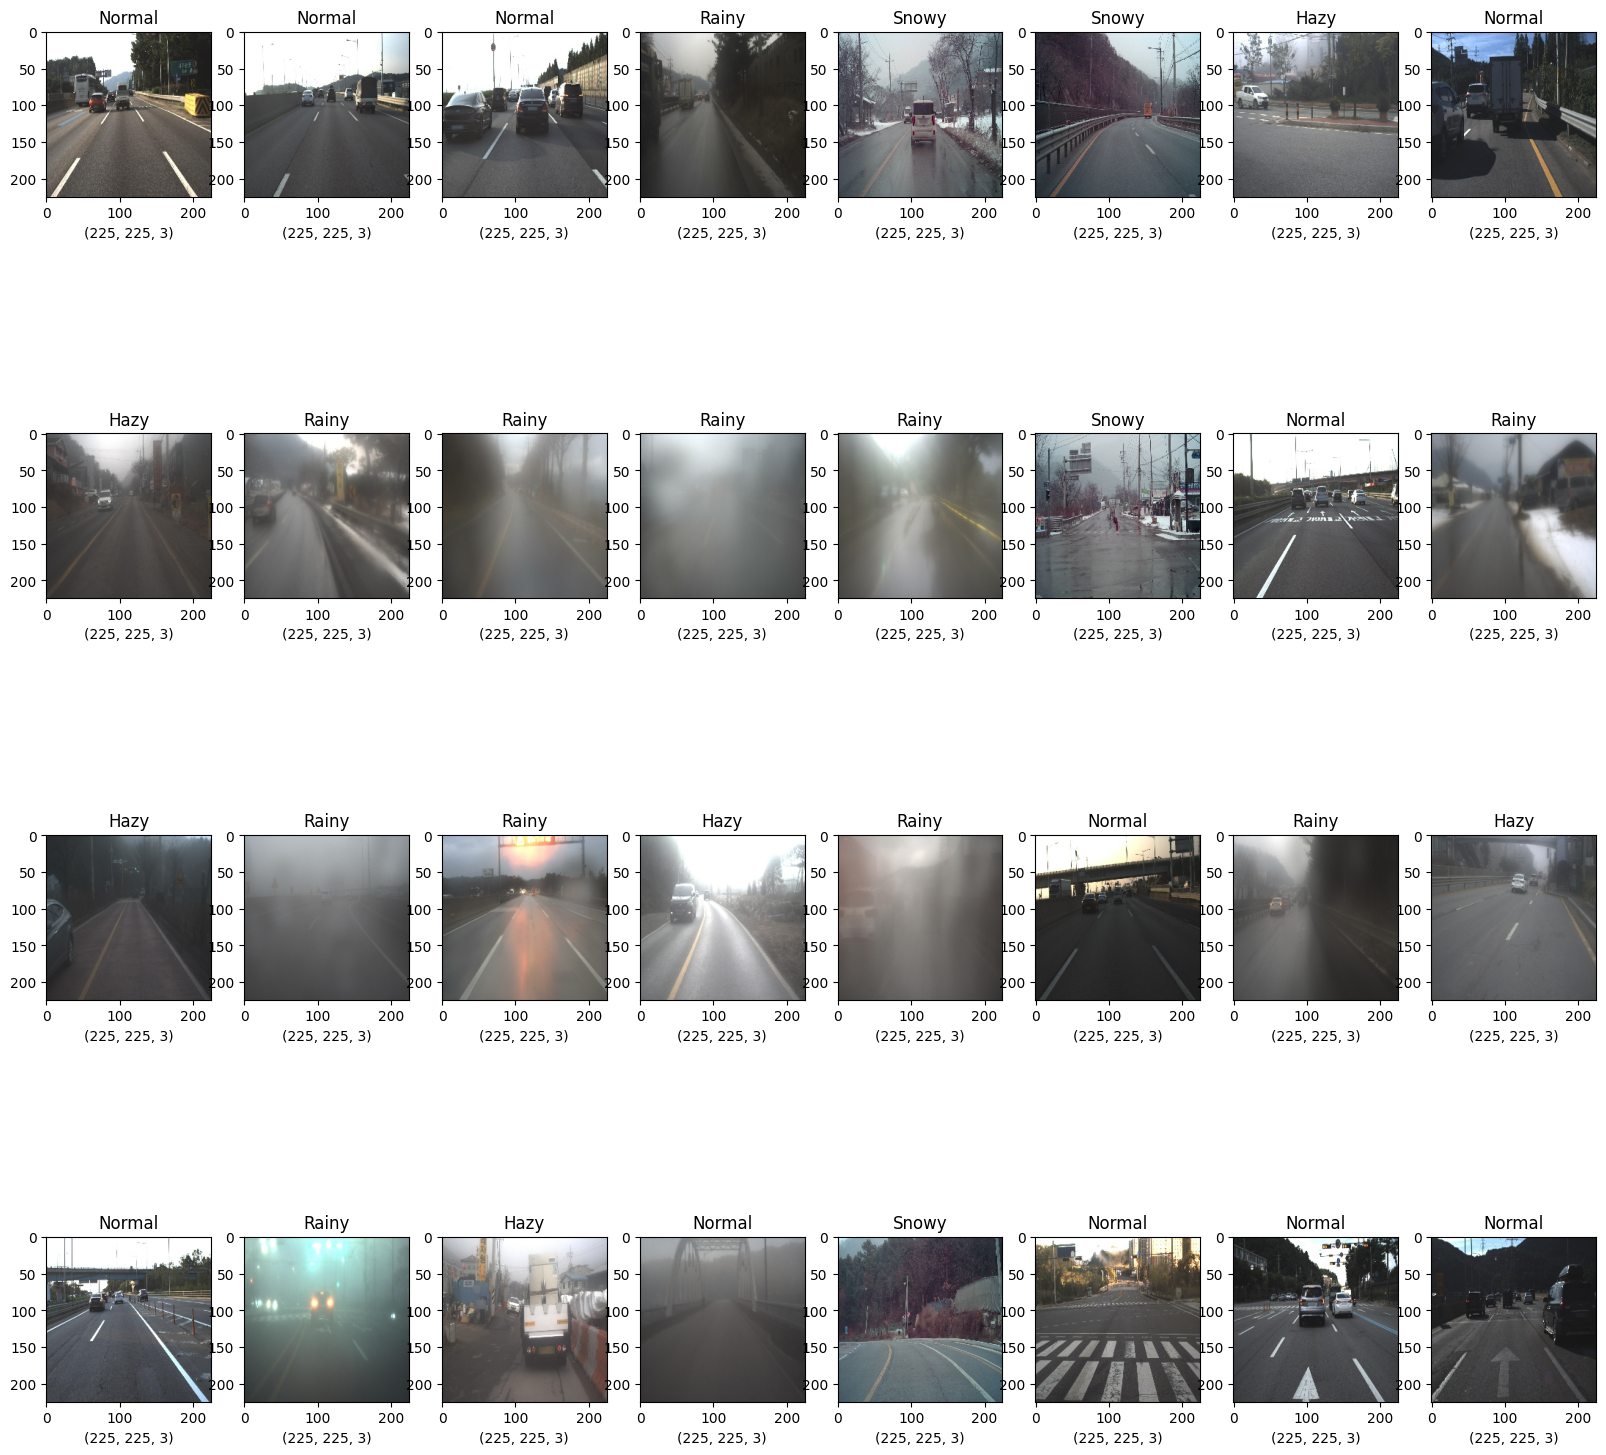

In [19]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in train_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 2. 데이터 split

In [20]:
test_ds = image_dataset_from_directory(
    directory=path+'//Validation',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=128,
    image_size=(225,225),
    seed=100
)

Found 5738 files belonging to 4 classes.


In [21]:
test_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

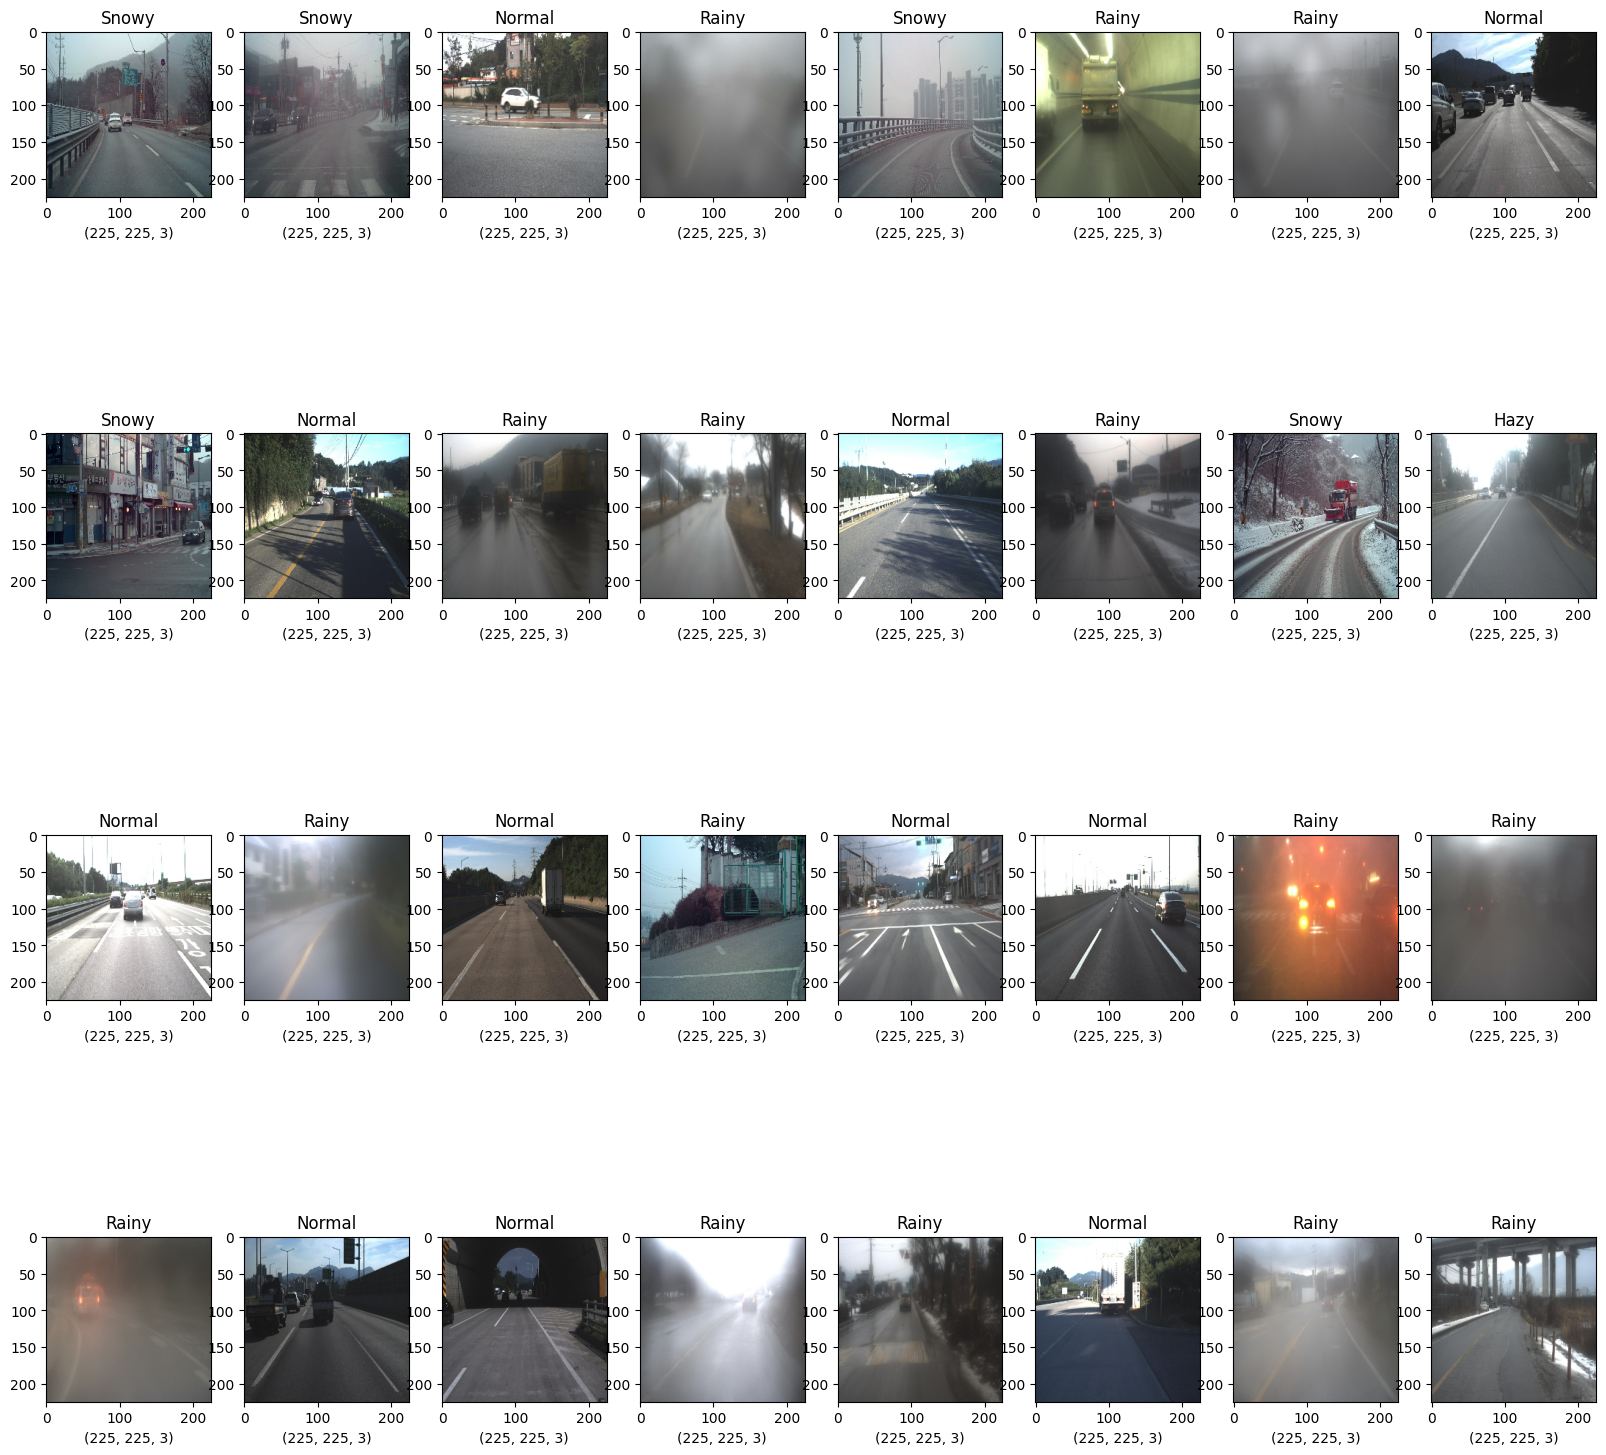

In [22]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in test_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 3. 모델 구성

In [23]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import experimental,Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential(

    [
    experimental.preprocessing.Rescaling(1./255,input_shape=(225,225,3)),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
    ]
)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 225, 225, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 225, 225, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [26]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

##### 4. 학습

In [27]:
history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


287/287 [==============================] - 136s 431ms/step - loss: 0.4163 - acc: 0.8701 - val_loss: 0.1761 - val_acc: 0.9386
Epoch 2/10
287/287 [==============================] - 251s 862ms/step - loss: 0.1320 - acc: 0.9586 - val_loss: 0.0991 - val_acc: 0.9698
Epoch 3/10
287/287 [==============================] - 250s 861ms/step - loss: 0.0804 - acc: 0.9733 - val_loss: 0.0827 - val_acc: 0.9764
Epoch 4/10
287/287 [==============================] - 250s 861ms/step - loss: 0.0545 - acc: 0.9812 - val_loss: 0.0740 - val_acc: 0.9779
Epoch 5/10
287/287 [==============================] - 250s 860ms/step - loss: 0.0364 - acc: 0.9877 - val_loss: 0.0795 - val_acc: 0.9792
Epoch 6/10
287/287 [==============================] - 250s 861ms/step - loss: 0.0328 - acc: 0.9893 - val_loss: 0.0534 - val_acc: 0.9846
Epoch 7/10
287/287 [==============================] - 250s 861ms/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0670 - val_acc: 0.9821
Epoch 8/10
287/287 [==============================] - 248s 

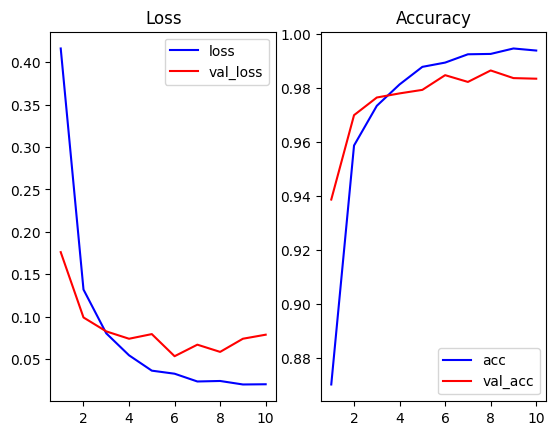

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(range(1,len(loss)+1),loss,color='blue',label='loss')
plt.plot(range(1,len(loss)+1),val_loss,color='red',label='val_loss')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(acc)+1),acc,color='blue',label='acc')
plt.plot(range(1,len(acc)+1),val_acc,color='red',label='val_acc')
plt.title("Accuracy")
plt.legend()
plt.show()

##### 5.검증

In [29]:
model.evaluate(test_ds)

45/45 [==============================] - 21s 386ms/step - loss: 0.0757 - acc: 0.9843


[0.07568950951099396, 0.9843150973320007]